In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
cols = ['Id','Datetime','Latitude','Longitude']
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\ProjectDemo\\1.txt',names=cols,header=None)

In [144]:
df.head()

,Id,Datetime,Latitude,Longitude
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248


In [145]:
df.shape

(588, 4)

In [146]:
from datetime import datetime
now = datetime.now()
timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1592754200.838222


In [147]:
str = df['Datetime'][0]

In [148]:
print(str)

2008-02-02 15:36:08


In [149]:
date_time_obj = datetime.strptime(str, '%Y-%m-%d %H:%M:%S')

In [150]:
print(date_time_obj)

2008-02-02 15:36:08


In [151]:
ts = datetime.timestamp(date_time_obj)

In [152]:
print(ts)

1201946768.0


In [153]:
df.Datetime.dtype

dtype('O')

In [154]:
df['Datetime'] =  pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [155]:
df.Datetime.dtype

dtype('<M8[ns]')

In [156]:
df['Datetime'][0]

Timestamp('2008-02-02 15:36:08')

In [157]:
print(datetime.timestamp(df['Datetime'][0]))

1201946768.0


In [158]:
df.head()

,Id,Datetime,Latitude,Longitude
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248


In [159]:
df['Timestamp']=df['Datetime']

In [160]:
df.head()

,Id,Datetime,Latitude,Longitude,Timestamp
0,1,2008-02-02 15:36:08,116.51172,39.92123,2008-02-02 15:36:08
1,1,2008-02-02 15:46:08,116.51135,39.93883,2008-02-02 15:46:08
2,1,2008-02-02 15:46:08,116.51135,39.93883,2008-02-02 15:46:08
3,1,2008-02-02 15:56:08,116.51627,39.91034,2008-02-02 15:56:08
4,1,2008-02-02 16:06:08,116.47186,39.91248,2008-02-02 16:06:08


In [161]:
def function(row):
    return datetime.timestamp(row['Timestamp'])

In [162]:
df['Timestamp'] = df.apply(function,axis=1)

In [163]:
df.head()

,Id,Datetime,Latitude,Longitude,Timestamp
0,1,2008-02-02 15:36:08,116.51172,39.92123,1.201947e+09
1,1,2008-02-02 15:46:08,116.51135,39.93883,1.201947e+09
2,1,2008-02-02 15:46:08,116.51135,39.93883,1.201947e+09
3,1,2008-02-02 15:56:08,116.51627,39.91034,1.201948e+09
4,1,2008-02-02 16:06:08,116.47186,39.91248,1.201949e+09


In [164]:
new_df = df.drop(['Datetime'],axis=1,inplace=False)

In [165]:
new_df.head()

,Id,Latitude,Longitude,Timestamp
0,1,116.51172,39.92123,1.201947e+09
1,1,116.51135,39.93883,1.201947e+09
2,1,116.51135,39.93883,1.201947e+09
3,1,116.51627,39.91034,1.201948e+09
4,1,116.47186,39.91248,1.201949e+09


In [166]:
print(new_df.shape[0])

588


In [167]:
new_df.drop_duplicates(['Latitude','Longitude','Timestamp'], keep='first', inplace = True)

In [168]:
new_df.head()

,Id,Latitude,Longitude,Timestamp
0,1,116.51172,39.92123,1.201947e+09
1,1,116.51135,39.93883,1.201947e+09
3,1,116.51627,39.91034,1.201948e+09
4,1,116.47186,39.91248,1.201949e+09
5,1,116.47217,39.92498,1.201949e+09


In [169]:
new_df.reset_index(inplace=True)

In [170]:
new_df.head()

,index,Id,Latitude,Longitude,Timestamp
0,0,1,116.51172,39.92123,1.201947e+09
1,1,1,116.51135,39.93883,1.201947e+09
2,3,1,116.51627,39.91034,1.201948e+09
3,4,1,116.47186,39.91248,1.201949e+09
4,5,1,116.47217,39.92498,1.201949e+09


In [171]:
print(new_df.shape[0])

564


In [172]:
n = new_df.shape[0]
eRad = 6371000

In [173]:
import math
import numpy as np
import sys

In [174]:
dist = []
speed = []
for i in range (1,n):
    var = math.sin((new_df['Latitude'][i]-new_df['Latitude'][i-1])/2)**2+math.cos(new_df['Latitude'][i])*math.cos(new_df['Latitude'][i-1])*math.sin((new_df['Longitude'][i]-new_df['Longitude'][i-1])/2)**2
    dtime = (new_df['Timestamp'][i]-new_df['Timestamp'][i-1])
    dist.append(np.float64(2*eRad*math.atan2(math.sqrt(var),math.sqrt(1-var))))
    speed.append(dist[-1]/dtime)

In [175]:
states = []
thres = 4
for i in range(0,len(speed)):
    diff = speed[i]-speed[i-1]
    if diff>thres:
        states.append("Acc")
    elif diff<(-1)*thres :
        states.append("Decc")
    else:
       states.append("Const")    

In [176]:
print(states)

['Decc', 'Acc', 'Acc', 'Decc', 'Acc', 'Decc', 'Decc', 'Acc', 'Decc', 'Acc', 'Const', 'Acc', 'Decc', 'Acc', 'Acc', 'Decc', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Decc', 'Const', 'Const', 'Const', 'Const', 'Const', 'Decc', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Acc', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Acc', 'Acc', 'Acc', 'Decc', 'Decc', 'Decc', 'Decc', 'Acc', 'Decc', 'Decc', 'Decc', 'Acc', 'Decc', 'Acc', 'Acc', 'Decc', 'Decc', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const', 'Const

In [177]:
angle=[]
for i in range (1,n):
    deltaL=df['Longitude'][i]-df['Longitude'][i-1]
    phi2=df['Latitude'][i]
    phi1=df['Latitude'][i-1]
    angle.append(math.atan2(math.sin(deltaL)*math.cos(phi2),math.cos(phi1)*math.sin(phi2)-math.sin(phi1)*math.cos(phi2)*math.cos(deltaL)))

In [178]:
dfg = pd.DataFrame({'speed':speed})

In [179]:
dfg['angle'] = angle

In [180]:
dfg.head()

,speed,angle
0,180.024226,-1.590252
1,295.807700,-0.000000
2,472.072418,1.389402
3,129.181808,-3.094725
4,183.940889,-1.543869


In [181]:
print(angle)

[-1.5902517181798588, -0.0, 1.3894022164055144, -3.0947249867096507, -1.5438692412112762, 1.59067821771086, 3.025208951107452, -0.02842878633605359, -0.23801279022124006, -3.1322580556333657, 0.27330914304983156, -0.37277678170076045, -0.0, 0.03215834669931137, 0.19512411142033118, 0.6060094639108322, 0.254745794401629, -0.29122758399955856, -1.0633389465774694, 1.5707941395889873, -2.0782449582659304, -1.5707897653037368, -1.5707919524660858, -1.570794139630492, -1.5707941396304905, -1.39868620708096, -0.0, 1.5707766402972403, 1.9257737534638593, 1.5707657039836174, -1.5707919521062608, -3.141592653589793, -0.0, 1.6291753170351233, -1.340780380132375, -0.0, 2.920457246615128, 2.0782395507821896, -1.652923993153175, -1.2487762793630208, 1.5707328990446494, -1.0117779775300675, 1.9257653855552346, -1.7896363523876657, 1.9257737534638593, -3.141592653589793, 2.116005229736276, -2.129718445326738, 0.29123962427430783, 1.6276740882141323, -1.1927277608207336, -2.3181331670227365, -0.0, 0.8

In [182]:
dfg.to_excel('C:\\Users\\DELL\\Desktop\\ProjectDemo\\SpeedAndDirectionsDumpedData.xlsx')

In [183]:
dataset = pd.read_csv('C:\\Users\\DELL\\Desktop\\ProjectDemo\\SpeedAndDirectionDumpedData.csv')
dfn = pd.DataFrame(dataset)

In [184]:
dfn['greenDriveValue'].fillna(value=0, inplace = True)
dfn['greenDriveType'].fillna(value=0, inplace = True)

In [185]:
dfn['HA']= dfn['greenDriveValue']*0
dfn['HB']= dfn['greenDriveValue']*0
dfn['HC']= dfn['greenDriveValue']*0

In [186]:
for index, row in dfn.iterrows():
    if dfn.loc[index,'greenDriveType'] == 3:
        dfn.loc[index,'HC'] = dfn.loc[index,'greenDriveValue']
    if dfn.loc[index,'greenDriveType'] == 2:
        dfn.loc[index,'HB'] = dfn.loc[index,'greenDriveValue']
    if dfn.loc[index,'greenDriveType'] == 1:
        dfn.loc[index,'HA'] = dfn.loc[index,'greenDriveValue']

In [187]:
for index, row in dfn.iterrows():
    if dfn.loc[index,'speed'] >= 35:
        dfn.loc[index,'OS'] = (dfn.loc[index,'speed']*2 - 70)*50/35
    else:
        dfn.loc[index,'OS'] = 0

In [188]:
import datetime

for index, row in dfn.iterrows():
    #if df.loc[index,'speed'] >= 50:
     dfn.loc[index,'Time'] =datetime.datetime.fromtimestamp(dfn.loc[index, 'timestamp']).strftime('%H:%M:%S')

dfn['Time'].str.split(':').head()
dfn['Time']= dfn['Time'].str.split(':').apply(lambda x: (int(x[0]) * 3600 + int(x[1])*60 + int(x[2]))/60)

In [189]:
for index, row in dfn.iterrows():
    dfn.loc[index,'acc'] = 0
for index, row in dfn.iterrows():
     if(dfn.iloc[index-1, 51] - dfn.iloc[index, 51]) != 0:
         dfn.iloc[index,52] =(int)(dfn.iloc[index-1, 2] - dfn.iloc[index, 2])/(dfn.iloc[index-1, 51] - dfn.iloc[index, 51])

In [190]:
for index, row in dfn.iterrows():
    dfn.loc[index,'v*a']= dfn.loc[index,'acc']*dfn.loc[index,'speed']

In [191]:
dfn['HA']= (dfn['HA']-np.mean(dfn['HA']))/np.std(dfn['HA'])
dfn['HB']= (dfn['HB']-np.mean(dfn['HB']))/np.std(dfn['HB'])
dfn['HC']= (dfn['HC']-np.mean(dfn['HC']))/np.std(dfn['HC'])
dfn['OS']= (dfn['OS']-np.mean(dfn['OS']))/np.std(dfn['OS'])
dfn['v*a']= (dfn['v*a']-np.mean(dfn['v*a']))/np.std(dfn['v*a'])

In [192]:
df1 = dfn[['v*a','HA','HB','HC','OS']]

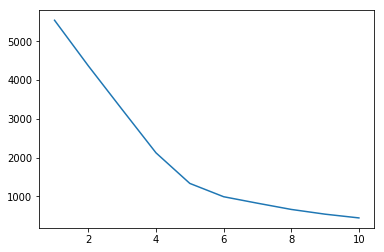

In [193]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [194]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [195]:
kmeans.fit(df1[['HA','HB','HC','OS','v*a']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [196]:
a = kmeans.labels_

In [197]:
ans = pd.Series(data = a)

In [198]:
ans.dtype

dtype('int32')

In [199]:
df1['Behavior'] = ans
pd.options.mode.chained_assignment = None

In [202]:
df1.to_excel('C:\\Users\\DELL\\Desktop\\ProjectDemoOutputs\\Results.xlsx', sheet_name = 'sheet1')